**<h1 align="center">TALLER 4 DATA SCIENCE</h1>**

# ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# Lectura de ficheros

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/DATA SCIENCE - BOOTCAMP/TALLER 4 - DATA SCIENCE/Taller4_Caso_real_NYC'

/content/gdrive/MyDrive/DATA SCIENCE - BOOTCAMP/TALLER 4 - DATA SCIENCE/Taller4_Caso_real_NYC


## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Obteniendo los datos relevantes

El cliente ha solicitado un análisis de la relación accidentes-área de los distritos. Los datos del municipio se almacenan en un archivo JSON en la carpeta ```datos```.

### Pregunta 

Utilice la función ```json.load()``` para cargar el archivo ```borough_data.json``` como diccionario.

**Respuesta.** 

In [4]:
with open('Caso NYC/data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
 'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
 'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
 'staten island': {'area': 58.37,
  'name': 'staten island',
  'population': 479458.0},
 'the bronx': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0}}

### Pregunta 
De manera similar, use la función pandas ```read_csv()``` para cargar el archivo ```accidentes.csv``` como un DataFrame. Nombra este DataFrame ```df```.


**Respuesta.** 

In [5]:
with open('Caso NYC/data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')
type(df)

pandas.core.frame.DataFrame

In [6]:
df=pd.read_csv('Caso NYC/data/accidents.csv',delimiter=";")
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


## Overview de la data

Analizemos las columnas presentes en el data frame

In [7]:
df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [8]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Tenemos las siguientes columnas

1. **BOROUGH**: el municipio en el que ocurrió el accidente
2. **COLLISION_ID**: un identificador único para esta colisión
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Motivos del accidente
4. **CROSS STREET NAME**: Calle transversal más cercana al lugar del accidente
5. **DATE**: Fecha del accidente
6. **TIME**: Hora del accidente
7. **LATITUDE**: Latitud del accidente
8. **LONGITUDE**: Longitud del accidente
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Lesión por categoría
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS**: Categoría muerte sabia
11. **ON STREET NAME**: Calle donde ocurrió el accidente
13. **VEHICLE TYPE CODE(1, 2, 3, 4, 5)**: Tipos de vehículos involucrados en el accidente
14. **ZIP CODE**: código postal del lugar del accidente

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando un plan de seguridad vial llamado [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). Su objetivo es reducir el número de muertes por accidentes de tránsito a *cero* para fines de 2024. El plan está creando nuevas y mejorando las medidas de seguridad actuales, algunas de ellas incluyen:

- [ ] Detección de peatones automatizada
- [X] Auditorías de seguridad vial en lugares de alto riesgo
- [ ] Ampliación de la red de carriles bici
- [X] Iniciativas específicas de educación y sensibilización
- [ ] Creación de islas de refugio peatonal
- [ ] Lanzamiento del programa integrado de reductor de velocidad basado en datos (topes y amortiguadores de velocidad)

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? Marque todo lo que corresponda.

**Nota:** Puede crear marcas de verificación haciendo doble clic en esta celda y agregando una ```[x]``` en las líneas correspondientes.

**Respuesta.**

- [ ] Detecciòn de peatones automatizada

- [x] Auditorías de seguridad vial en lugares de alto riesgo: Como se ha comentado, los datos pueden ayudar a reconocer los puntos problemáticos. Podemos verificar los números más fuertes donde ha ocurrido un alto número de accidentes en el pasado, luego inspeccionamos el área para ver qué medidas adicionales deben implementarse.

- [ ] Ampliación de la red de carriles bici

- [x] Iniciativas especificas de educación y sensibilización: Los datos proporcionan el factor contribuyente de los accidentes junto con el tipo de lugares que estuvieron involucrados en ellos. A continuación, podemos estudiar los tipos de lugares que causan el mayor número de accidentes y organizar iniciativas educativas en torno a ellos.

- [ ] Creación de islas de refugio peatonal

- [ ] Lanzamiento del programa integrado de reductor de velocidad en datos (topes y amortiguadores de velocidad)

Sigamos adelante y respondamos a cada una de las preguntas del cliente.

## Respondiendo las preguntas del cliente 

### Ejercicio 2 

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.

**Respuesta.** 

Text(0, 0.5, 'Frecuencia')

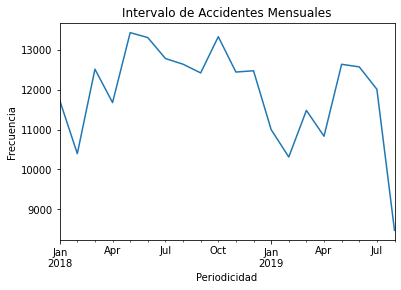

In [11]:
df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()
plt.title('Intervalo de Accidentes Mensuales')
plt.xlabel('Periodicidad')
plt.ylabel('Frecuencia')

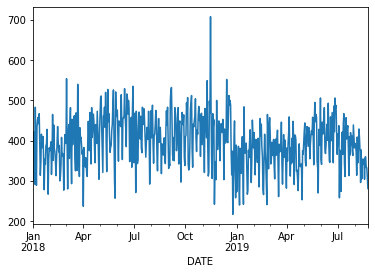

In [12]:
#df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents = df.groupby(df['DATE'].dt.to_period('D')).size()
monthly_accidents.plot.line()

In [13]:
max(df['DATE'])

Timestamp('2019-08-24 00:00:00')

En el grafico se puede evidenciar que los accidentes en el año 2018 tenian una frecuencia bastante elevada sobre todo en Junio llevando el pico de la grafica, pero en el año 2019 los accidentes disminuyeron con respecto al año 2018.

### Ejercicio 3

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Respuesta.** 


Al realizar detenidamente el analisis de la grafica se puede observar que Agosto de 2019 presenta el menor numero de accidentes, pero esto se puede deber a que no se completo el registro de este mes lo que le genera una gran disminución de accidentes dejandolo como el menos afectado de accidentes del año.

In [45]:
max(df['DATE'])

Timestamp('2019-08-24 00:00:00')

Seguido a este mes se puede observar que el mes de Febero tanto en 2018 como en 2019 tiene un numero bajo de accidentes, esto puede deberse a que en NY este mes es el mas frio del año ya que es invierno y las temperaturas son muy bajas por lo que la gente decide no salir con tanta frecuencia a las calles para evitar distintos tipos de accidentes de transito o en su defecto prefieren tomar transporte publico.

### Ejercicio 4 
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

**Respuesta.**

Text(0, 0.5, 'Frecuencia de Accidentes')

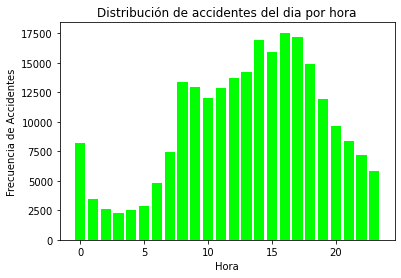

In [46]:
df['TIME']=pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour
hourly_accidents = df.groupby('HOUR').size()
hourly_accidents.index
hourly_accidents.values
plt.bar(hourly_accidents.index,hourly_accidents.values, color='lime')
plt.title('Distribución de accidentes del dia por hora')
plt.xlabel('Hora')
plt.ylabel('Frecuencia de Accidentes')

In [47]:
hourly_accidents

HOUR
0      8160
1      3460
2      2570
3      2302
4      2562
5      2878
6      4844
7      7399
8     13403
9     12939
10    11981
11    12815
12    13731
13    14224
14    16889
15    15886
16    17536
17    17209
18    14899
19    11885
20     9597
21     8330
22     7216
23     5807
dtype: int64

In [48]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR
0,2018-09-26,2021-09-02 12:12:00,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,12
1,2018-09-25,2021-09-02 16:30:00,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,16
2,2019-08-22,2021-09-02 19:30:00,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,19
3,2018-09-23,2021-09-02 13:10:00,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,13
4,2019-08-20,2021-09-02 22:40:00,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,2018-01-20,2021-09-02 15:00:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,15
238518,2018-01-04,2021-09-02 14:00:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,14
238519,2018-01-20,2021-09-02 13:05:00,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,13
238520,2018-01-29,2021-09-02 17:45:00,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,17


En la grafica obtenida se puede evidenciar que en el rango de 1:00pm a 6:00pm la frecuencia de accidentes va aumentando considerablemente hasta las 5:00pm y de ahi va disminuyendo. Con esto se puede concluir que los accidentes diarios se presentan con mayor frecuencia en las horas de la tarde teniendo el pico de la grafica en la hora 17:00(5:00pm), y la hora donde no se presentan con tanta frecuencia es a las 3:00am.

### Ejercicio 5 

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Respuesta.** 


Al realizar este reporte lo que podemos obtener es en que rango de horas del dia los accidentes son mas frecuentes y respecto a esto se puede empezar a analizar por que motivo en ese rango de horas se presentan tantos accidentes y posteriormente se puede empezar a plantear estrategias para disminuir los accidentes diarios y asi mejorar el transito vial.

### Ejercicio 6 

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Respuesta.**

Text(0, 0.5, 'Frecuencia de Accidentes')

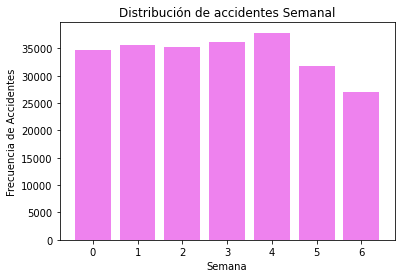

In [49]:
df['DATE']=pd.to_datetime(df['DATE'])
df['WEEKDAY'] = df['DATE'].dt.weekday
weekly_accidents = df.groupby('WEEKDAY').size()
weekly_accidents.index
weekly_accidents.values
plt.bar(weekly_accidents.index,weekly_accidents.values, color='violet')
plt.title('Distribución de accidentes Semanal')
plt.xlabel('Semana')
plt.ylabel('Frecuencia de Accidentes')

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

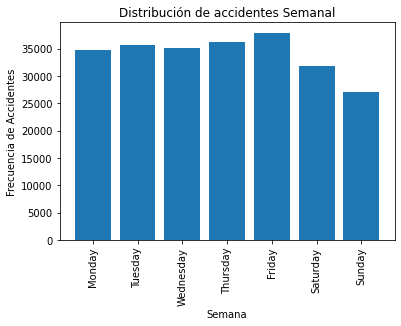

In [50]:
df['DATE']=pd.to_datetime(df['DATE'])
df['WEEKDAY'] = df['DATE'].dt.day_name()
#weekly_accidents = df.groupby('WEEKDAY').size()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_accidents = df.groupby(['WEEKDAY']).size().reindex(cats)
weekly_accidents.index
weekly_accidents.values
plt.bar(weekly_accidents.index,weekly_accidents.values)
plt.title('Distribución de accidentes Semanal')
plt.xlabel('Semana')
plt.ylabel('Frecuencia de Accidentes')
plt.xticks(rotation=90)

In [51]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,WEEKDAY
0,2018-09-26,2021-09-02 12:12:00,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,12,Wednesday
1,2018-09-25,2021-09-02 16:30:00,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,16,Tuesday
2,2019-08-22,2021-09-02 19:30:00,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,19,Thursday
3,2018-09-23,2021-09-02 13:10:00,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,13,Sunday
4,2019-08-20,2021-09-02 22:40:00,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,22,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,2018-01-20,2021-09-02 15:00:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,15,Saturday
238518,2018-01-04,2021-09-02 14:00:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,14,Thursday
238519,2018-01-20,2021-09-02 13:05:00,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,13,Saturday
238520,2018-01-29,2021-09-02 17:45:00,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,17,Monday


Segun la grafica se puede concluir que la mayor frecuencia de accidentes se presenta en la semana de LUNES a VIERNES lo cual puede deberse a que mucha gente tiene que salir cada uno de estos dias a trabajar y prefieren salir en sus propios vehiculos que utilizar el TP, y de estos dias el viernes es el que presenta la mayor frecuencia de accidentes y esto se puede deber a que es el ultimo dia de entre semana y la gente quiere salir a divertirse un rato para desestresarse de toda la carga laboral o personal que tuvo durante la semana y aprovechan este dia ya que posiblemente no tienen que madrugar un sabado. Y se puede determinar que los fines de semana son los dias que no tienen tanta frecuencia de accidentes en especial el dia domingo y esto se puede deber a que la gente utiliza estos dos dias de la semana para descansar y disfrutar con la familia.

### Ejercicio 7

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Respuesta.**

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

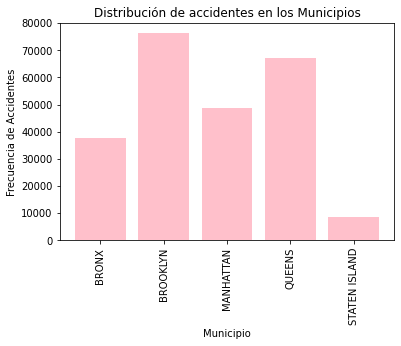

In [35]:
borough_accidents = df.groupby('BOROUGH').size()
borough_accidents.index
borough_accidents.values
plt.bar(borough_accidents.index,borough_accidents.values, color='pink')
plt.title('Distribución de accidentes en los Municipios')
plt.xlabel('Municipio')
plt.ylabel('Frecuencia de Accidentes')
plt.xticks(rotation=90)

Segun la grafica se puede evidenciar que en NY el municipio con mayor frecuencia de accidentes es BROOKLYN y el que presenta menor frecuencia de accidentes es STATEN ISLAND.

In [29]:
valores = borough_data.values()
areas_borough = {}
for ab in valores:
  areas = ab['area'] 
  names = ab['name']
  areas_borough[names]=areas
print(areas_borough) 

{'the bronx': 42.1, 'brooklyn': 70.82, 'manhattan': 22.83, 'queens': 108.53, 'staten island': 58.37}


Segun la información arrojada por la variable areas_borough el municipio que presenta mayor area es QUEENS con 108.53 y el que presenta menor area es MANHATTAN con 22.83.

Text(0, 0.5, 'Area')

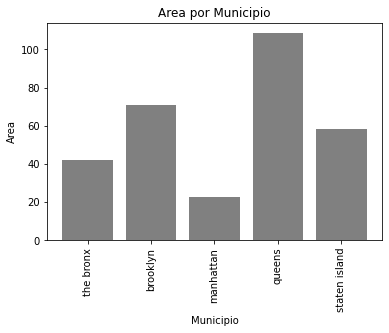

In [31]:
plt.bar(range(len(areas_borough)), areas_borough.values(), align= 'center', color= 'gray')
plt.xticks(range(len(areas_borough)), list(areas_borough.keys()), rotation=90)
plt.title('Area por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Area')

In [22]:
#Cambio de Claves de Diccionario para no tener inconvenientes con los nombres
cambio_borough_data = {'brooklyn': 'BROOKLYN', 'manhattan': 'MANHATTAN', 'queens': 'QUEENS', 'staten island': 'STATEN ISLAND', 'the bronx': 'BRONX'}
nuevo_borough_data =  dict((cambio_borough_data[key], value) for (key, value) in borough_data.items())
nuevo_borough_data

{'BRONX': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0},
 'BROOKLYN': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
 'MANHATTAN': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
 'QUEENS': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
 'STATEN ISLAND': {'area': 58.37,
  'name': 'staten island',
  'population': 479458.0}}

Text(0.5, 1.0, 'ACCIDENTES POR MILLA CUADRADA POR MUNICIPIO')

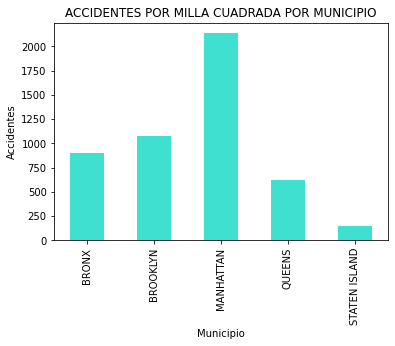

In [34]:
import math
dfConcentrationAccidents = (df.groupby(df['BOROUGH']).size())
for i in list(dfConcentrationAccidents.index): 
  area = nuevo_borough_data[i]['area']
  dfConcentrationAccidents[i] = math.ceil(dfConcentrationAccidents[i]/area)
dfConcentrationAccidents.plot.bar(color= 'turquoise')
plt.xlabel('Municipio')
plt.ylabel('Accidentes')
plt.title("ACCIDENTES POR MILLA CUADRADA POR MUNICIPIO")

Con ayuda de la grafica se evidencia facilmente que Manhattan es el municipio que tiene mayor frecuencia de accidentes por millas cuadradas y que Staten Island es el municipio que tiene la menor frecuencia de accidentes por millas cuadradas.

Text(0.5, 1.0, 'Accidentes por millas cuadradas')

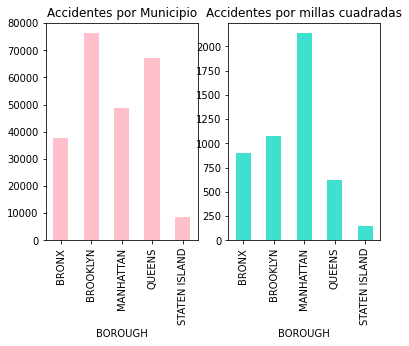

In [42]:
plt.subplot(121)
borough_accidents.plot.bar(color='pink')
plt.title('Accidentes por Municipio')
plt.subplot(122)
dfConcentrationAccidents.plot.bar(color='turquoise')
plt.title('Accidentes por millas cuadradas')

In [43]:
valores

dict_values([{'name': 'the bronx', 'population': 1471160.0, 'area': 42.1}, {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82}, {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83}, {'name': 'queens', 'population': 2358582.0, 'area': 108.53}, {'name': 'staten island', 'population': 479458.0, 'area': 58.37}])

***Conclusión:*** Al realizar detenidamente el analisis de las 2 graficas obtenidas anteriormente se puede evidenciar que BROOKLYN tiene mayor frecuencia de accidentes segun la grafica 1, pero en la grafica 2 se evidencia que MANHATTAN tiene la mayor frecuencia de accidentes por millas cuadradas. En lo que concuerdan las dos graficas es en que STATENISLAND tiene la menor frecuencia de accidentes.

### Ejercicio 8 

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Respuesta.**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


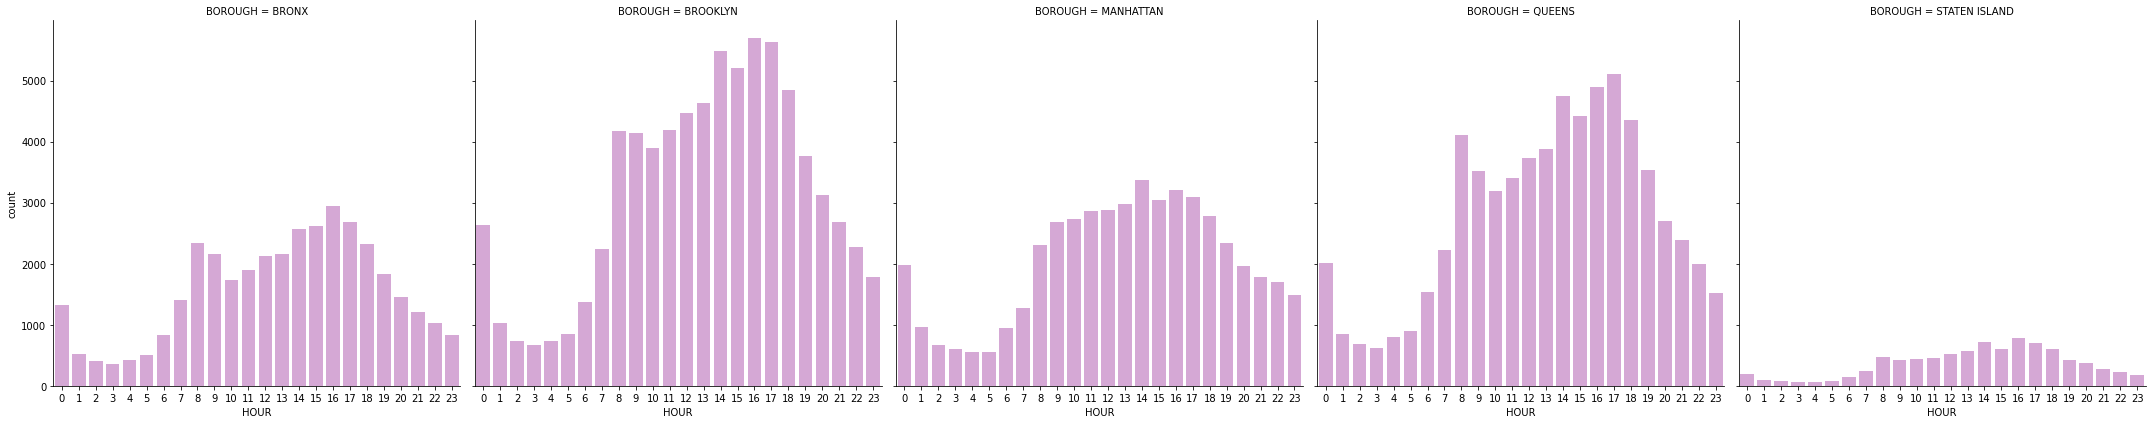

In [56]:
df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='BOROUGH', height=6)
chart.map(sns.barplot, 'HOUR', 'count', color='plum')

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

***Al realizar el analisis de las graficas se puede concluir que:***

a. Mayor frecuencia horaria de Accidentes en los diferentes municipios:
  - Bronx: 16 horas
  - Brooklyn: 16 horas
  - Manhattan: 14 horas
  - Queens: 17 horas
  - Staten Island: 16 horas

b. Menor frecuencia horaria de Accidentes en los diferentes municipios:
  - Bronx: 3:00am
  - Brooklyn: 3:00am
  - Manhattan: 3:00am y 4:00am
  - Queens: 3:00am
  - Staten Island: 3:00am

c. En general, segun la grafica la mayor frecuencia de accidentes se presenta en el rango horario de [14:00 - 18:00] en todos los municipios y la menor frecuencia se presenta en el rango de [0:00 - 7:00].

### Ejercicio 9 

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

**Respuesta**.


Text(0, 0.5, 'Frecuencia de Accidentes')

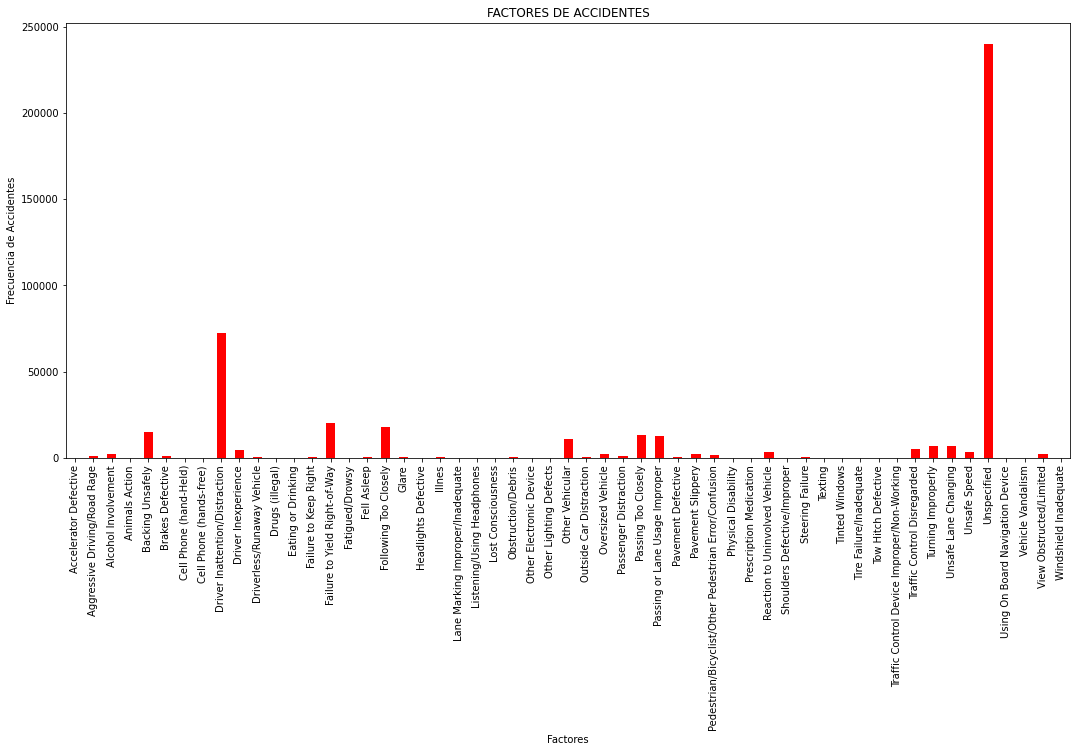

In [ ]:
Factores_accidents = pd.DataFrame({'factores': pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],df['CONTRIBUTING FACTOR VEHICLE 2'],df['CONTRIBUTING FACTOR VEHICLE 3'],df['CONTRIBUTING FACTOR VEHICLE 4'],df['CONTRIBUTING FACTOR VEHICLE 5']], sort = False)}).reset_index()
Factores_accidents = Factores_accidents.groupby(['factores']).size()
Factores_accidents.plot.bar(figsize=(18,8), color='red')
plt.title('FACTORES DE ACCIDENTES')
plt.xlabel('Factores')
plt.ylabel('Frecuencia de Accidentes')

In [57]:
columnas = [df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2'], df['CONTRIBUTING FACTOR VEHICLE 3'], df['CONTRIBUTING FACTOR VEHICLE 4'], df['CONTRIBUTING FACTOR VEHICLE 5']]
dfFactores = pd.concat(columnas, join='inner').reset_index()
dfFactores.columns = ['INDEX', 'FACTOR']
dfFactores_accidents = dfFactores.groupby('FACTOR')['INDEX'].nunique()
print('Los factores de accidentes en NY son:')
dfFactores_accidents.sort_values(ascending=False)

Los factores de accidentes en NY son:


FACTOR
Unspecified                                              190096
Driver Inattention/Distraction                            61752
Failure to Yield Right-of-Way                             19641
Following Too Closely                                     17293
Backing Unsafely                                          14835
Passing Too Closely                                       12631
Passing or Lane Usage Improper                            11808
Other Vehicular                                            8860
Unsafe Lane Changing                                       6643
Turning Improperly                                         6626
Traffic Control Disregarded                                4687
Driver Inexperience                                        4152
Unsafe Speed                                               3469
Reaction to Uninvolved Vehicle                             3034
Alcohol Involvement                                        2491
View Obstructed/Limited          

***CONCLUSIÓN***
- Se puede concluir que el mayor factor de accidentes en NY es Unspecified llevando el pico maximo de la grafica ya que en la gran mayoria de los casos no se conocen a ciencia cierta los motivos de los diferentes accidentes.
- Los factores de accidentes con mayor frecuencia de accientes son:
  - Distracción del conductor
  - No ceder el derecho de paso
  - Seguir demasiado cerca
  - Retroceder inseguramente
  - Pasar demasiado cerca
  - Adelantar o usar el carril incorrectamente.

### Ejercicio 10 

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

**Respuesta.** 

Text(0, 0.5, 'Frecuencia')

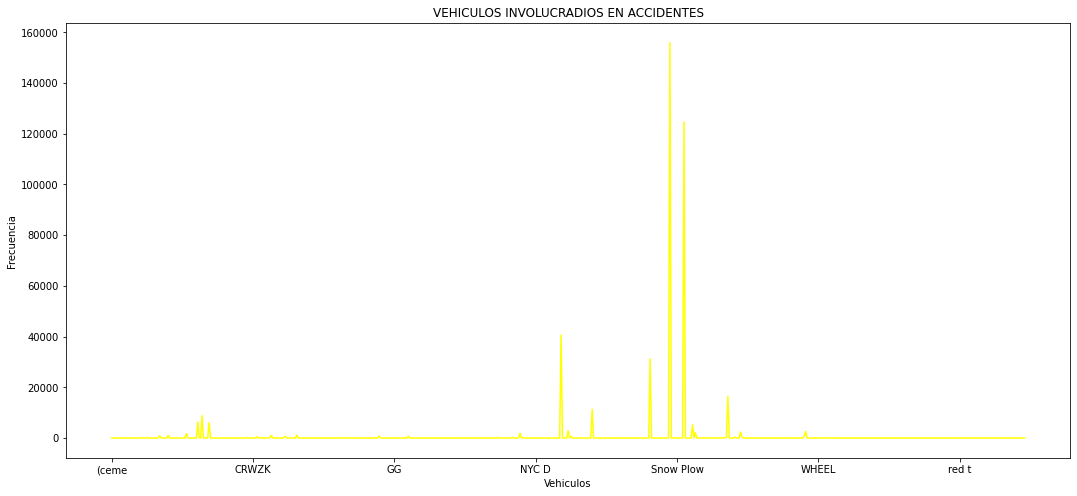

In [71]:
Vehiculos_accidents = pd.DataFrame({'Vehiculos' : pd.concat([df['VEHICLE TYPE CODE 1'],df['VEHICLE TYPE CODE 2'],df['VEHICLE TYPE CODE 3'],df['VEHICLE TYPE CODE 4'],df['VEHICLE TYPE CODE 5']],sort= False)}).reset_index()
Vehiculos_accidents = Vehiculos_accidents.groupby(['Vehiculos']).size()
Vehiculos_accidents.plot(figsize=(18,8), color='yellow')
plt.title('VEHICULOS INVOLUCRADIOS EN ACCIDENTES')
plt.xlabel('Vehiculos')
plt.ylabel('Frecuencia')

In [74]:
Vehiculos = [df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'], df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'], df['VEHICLE TYPE CODE 5']]
Vehiculos_General = pd.concat(Vehiculos).reset_index()
Vehiculos_General.columns = ['INDEX', 'VEHICLE']
Vehiculos_Involucrados_Accidents = Vehiculos_General.groupby('VEHICLE')['INDEX'].nunique()
print('***LISTADO GENERAL DE TODOS LOS VEHICULOS INVOLUCRADOS EN ACCIDENTES***\n')
Vehiculos_Involucrados_Accidents.sort_values(ascending=False)[:30]

***LISTADO GENERAL DE TODOS LOS VEHICULOS INVOLUCRADOS EN ACCIDENTES***



VEHICLE
Sedan                                  119714
Station Wagon/Sport Utility Vehicle     99146
PASSENGER VEHICLE                       31228
SPORT UTILITY / STATION WAGON           25059
Taxi                                    14584
Pick-up Truck                           10864
Box Truck                                8509
Bike                                     6264
Bus                                      5848
TAXI                                     4497
PICK-UP TRUCK                            2774
Van                                      2515
Tractor Truck Diesel                     2317
TK                                       2048
Motorcycle                               1888
BU                                       1720
Dump                                     1105
BICYCLE                                  1006
Convertible                               987
Ambulance                                 792
PK                                        712
Garbage or Refuse         

In [76]:
Veh_Tipo1 = df[['BOROUGH', 'VEHICLE TYPE CODE 1']] 
Veh_Tipo2 = df[['BOROUGH', 'VEHICLE TYPE CODE 2']]
Veh_Tipo3 = df[['BOROUGH', 'VEHICLE TYPE CODE 3']]
Veh_Tipo4 = df[['BOROUGH', 'VEHICLE TYPE CODE 4']]
Veh_Tipo5 = df[['BOROUGH', 'VEHICLE TYPE CODE 5']]
Veh_Tipo1.columns = ['BOROUGH', 'VEHICLE']
Veh_Tipo2.columns = ['BOROUGH', 'VEHICLE']
Veh_Tipo3.columns = ['BOROUGH', 'VEHICLE']
Veh_Tipo4.columns = ['BOROUGH', 'VEHICLE']
Veh_Tipo5.columns = ['BOROUGH', 'VEHICLE']
Vehiculos_Municipios = pd.concat([Veh_Tipo1, Veh_Tipo2, Veh_Tipo3, Veh_Tipo4, Veh_Tipo5]).reset_index()
Vehiculos_Municipios.columns = ['INDEX', 'BOROUGH', 'VEHICLE']
Municipio_Vehiculos = Vehiculos_Municipios.groupby(by= ['BOROUGH', 'VEHICLE'])['INDEX'].nunique()
boroughlist = list(nuevo_borough_data.keys())
print('***LISTADO DE VEHICULOS IMPLICADOS EN ACCIDENTES POR MUNICIPIOS***\n')
for i in boroughlist:
  print(i, Municipio_Vehiculos[i].sort_values(ascending=False)[:6])
  print('\n')

***LISTADO DE VEHICULOS IMPLICADOS EN ACCIDENTES POR MUNICIPIOS***

BRONX VEHICLE
Sedan                                  19652
Station Wagon/Sport Utility Vehicle    15434
PASSENGER VEHICLE                       4941
SPORT UTILITY / STATION WAGON           3751
Pick-up Truck                           1670
Taxi                                    1623
Name: INDEX, dtype: int64


BROOKLYN VEHICLE
Sedan                                  39459
Station Wagon/Sport Utility Vehicle    32262
PASSENGER VEHICLE                      10177
SPORT UTILITY / STATION WAGON           8099
Pick-up Truck                           3195
Box Truck                               2367
Name: INDEX, dtype: int64


MANHATTAN VEHICLE
Sedan                                  20727
Station Wagon/Sport Utility Vehicle    16432
Taxi                                    8989
PASSENGER VEHICLE                       5627
SPORT UTILITY / STATION WAGON           4415
Box Truck                               3545
Name: INDEX, dtyp

Segun el reporte anterior se puede concluir que los vehiculos mas involucrados en los accidentes presentados en NY son:
- Sedan
- Station Wagon/Sport Utility Vehicle
- PASSENGER VEHICLE
- SPORT UTILITY / STATION WAGON

### Ejercicio 11 

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

**Respuesta.**


### Ejercicio 12 

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

**Repsuesta.**